In [225]:
import json
import pandas as pd
import datetime
import numpy as np
from pathlib import Path
import hvplot.pandas
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [226]:
# Import csv files from github

url = 'https://raw.githubusercontent.com/Leroy44/BTC-skew-as-a-trading-signal/main/Data/all_data.csv'


In [227]:
# Define path, datetime format, parse dates

#all_data_df = pd.read_csv(url, index_col = "date", infer_datetime_format= True, parse_dates=True)
all_data_df = pd.read_csv(Path(r"C:\Users\Ling Zhou\Desktop\Project 2\BTC-skew-as-a-trading-signal\Data\all_data.csv"), index_col = "date", infer_datetime_format= True, parse_dates=True)
all_data_df

,btc_close,btc_volume,eth_close,eth_volume,dxy_close,dxy_volume,es_close,es_volume,gc_close,gc_volume,...,eth_fiveDelta90DayExp,eth_thirtyFiveDelta180DayExp,eth_twentyFiveDelta180DayExp,eth_fifteenDelta180DayExp,eth_fiveDelta180DayExp,eth_atm7,eth_atm30,eth_atm60,eth_atm90,eth_atm180
date,,,,,,,,,,,,,,,,,,,,,
2005-09-06 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1103.25,1711.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-09-06 17:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1103.25,744.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-09-06 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1103.00,395.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-09-06 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1102.75,280.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-09-06 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1102.75,370.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-05 15:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.11,0.74,2.07,4.32,11.95,79.68,81.17,82.22,82.75,82.95
2022-01-05 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.14,0.76,2.28,4.52,11.61,81.92,82.05,82.83,83.31,83.31
2022-01-05 17:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.32,1.25,2.96,5.42,11.56,82.99,82.74,83.16,83.15,83.42


In [228]:
chopped_data_df = all_data_df.loc["2020-03-01 18:00:00":"2021-12-31 19:00:00"]
chopped_data_int_df = chopped_data_df.interpolate('linear')
chopped_data_int_df.head(5)

,btc_close,btc_volume,eth_close,eth_volume,dxy_close,dxy_volume,es_close,es_volume,gc_close,gc_volume,...,eth_fiveDelta90DayExp,eth_thirtyFiveDelta180DayExp,eth_twentyFiveDelta180DayExp,eth_fifteenDelta180DayExp,eth_fiveDelta180DayExp,eth_atm7,eth_atm30,eth_atm60,eth_atm90,eth_atm180
date,,,,,,,,,,,,,,,,,,,,,
2020-03-01 18:00:00,8456.36,1765.940,218.57,26526.352,218.57,26526.352,2843.75,101216.0,1676.8,15692.0,...,9.24,4.93,8.01,11.93,4.78,100.37,93.17,90.93,87.88,84.37
2020-03-01 19:00:00,8533.54,2949.294,219.59,8449.286,219.59,8449.286,2842.75,51816.0,1688.8,17573.0,...,9.47,4.90,7.98,11.94,4.89,100.41,92.87,90.99,87.86,84.18
2020-03-01 20:00:00,8484.55,1803.343,214.24,6292.348,214.24,6292.348,2870.75,76963.0,1687.4,35446.0,...,9.32,4.76,7.69,11.78,4.79,100.03,92.81,90.97,87.97,84.34
2020-03-01 21:00:00,8513.73,2083.146,222.07,9881.078,222.07,9881.078,2899.75,54147.0,1687.1,15904.0,...,8.56,4.11,6.60,11.13,4.39,98.04,92.53,90.69,88.20,84.46
2020-03-01 22:00:00,8565.00,1383.603,219.87,11060.615,219.87,11060.615,2894.75,37502.0,1690.5,11920.0,...,9.28,4.70,7.58,12.48,4.75,98.42,93.05,91.10,88.25,84.69


In [229]:
#removing extra vol and skew parameters
chopped_data_int_df = chopped_data_int_df.drop(["btc_thirtyFiveDelta90DayExp","btc_twentyFiveDelta90DayExp","btc_fifteenDelta90DayExp","btc_fiveDelta90DayExp","btc_thirtyFiveDelta180DayExp","btc_twentyFiveDelta180DayExp","btc_fifteenDelta180DayExp","btc_fiveDelta180DayExp"], axis=1)
chopped_data_int_df = chopped_data_int_df.drop(["eth_thirtyFiveDelta90DayExp","eth_twentyFiveDelta90DayExp","eth_fifteenDelta90DayExp","eth_fiveDelta90DayExp","eth_thirtyFiveDelta180DayExp","eth_twentyFiveDelta180DayExp","eth_fifteenDelta180DayExp","eth_fiveDelta180DayExp"], axis=1)
chopped_data_int_df = chopped_data_int_df.drop(["btc_thirtyFiveDelta60DayExp","btc_twentyFiveDelta60DayExp","btc_fifteenDelta60DayExp","btc_fiveDelta60DayExp","eth_thirtyFiveDelta60DayExp","eth_twentyFiveDelta60DayExp","eth_fifteenDelta60DayExp","eth_fiveDelta60DayExp"], axis=1)
chopped_data_int_df = chopped_data_int_df.drop(["btc_thirtyFiveDelta30DayExp","btc_fifteenDelta30DayExp","btc_fiveDelta30DayExp","eth_thirtyFiveDelta30DayExp","eth_fifteenDelta30DayExp","eth_fiveDelta30DayExp"], axis=1)
chopped_data_int_df = chopped_data_int_df.drop(["btc_thirtyFiveDelta7DayExp","btc_fifteenDelta7DayExp","btc_fiveDelta7DayExp","eth_thirtyFiveDelta7DayExp","eth_fifteenDelta7DayExp","eth_fiveDelta7DayExp"], axis=1)
chopped_data_int_df = chopped_data_int_df.drop(["btc_atm60","btc_atm90","btc_atm180","eth_atm60","eth_atm90","eth_atm180"], axis=1)


In [230]:
#adding moving averages
chopped_data_int_df["btc_50hma"] = chopped_data_int_df['btc_close'].rolling(50).mean()
chopped_data_int_df["btc_200hma"] = chopped_data_int_df['btc_close'].rolling(200).mean()
chopped_data_int_df["btc_50_200_hma_cross"] = chopped_data_int_df['btc_close'].rolling(50).mean()-chopped_data_int_df['eth_close'].rolling(200).mean()
chopped_data_int_df["eth_50hma"] = chopped_data_int_df['eth_close'].rolling(50).mean()
chopped_data_int_df["eth_200hma"] = chopped_data_int_df['eth_close'].rolling(200).mean()
chopped_data_int_df["eth_50_200_hma_cross"] = chopped_data_int_df['eth_close'].rolling(50).mean()-chopped_data_int_df['eth_close'].rolling(200).mean()
chopped_data_int_df["btc_eth_ratio"] = chopped_data_int_df['btc_close']/chopped_data_int_df['eth_close']

# Create new variable for % change between intervals

# Spot prices
chopped_data_int_df["btc_close_pct"] = chopped_data_int_df['btc_close'].pct_change()
chopped_data_int_df["eth_close_pct"] = chopped_data_int_df['eth_close'].pct_change()
chopped_data_int_df["dxy_close_pct"] = chopped_data_int_df['dxy_close'].pct_change()
chopped_data_int_df["es_close_pct"] = chopped_data_int_df['es_close'].pct_change()
chopped_data_int_df["gc_close_pct"] = chopped_data_int_df['gc_close'].pct_change()
chopped_data_int_df["us_close_pct"] = chopped_data_int_df['us_close'].pct_change()
chopped_data_int_df["btc_eth_ratio_pct"] = chopped_data_int_df['btc_eth_ratio'].pct_change()

In [231]:
cleaned_data_df = chopped_data_int_df.drop(["btc_close","eth_close","dxy_close","gc_close","us_close","es_close"], axis=1)

In [232]:
for col in cleaned_data_df.columns:
    print(col)

btc_volume
eth_volume
dxy_volume
es_volume
gc_volume
us_volume
btc_twentyFiveDelta7DayExp
btc_twentyFiveDelta30DayExp
btc_atm7
btc_atm30
eth_twentyFiveDelta7DayExp
eth_twentyFiveDelta30DayExp
eth_atm7
eth_atm30
btc_50hma
btc_200hma
btc_50_200_hma_cross
eth_50hma
eth_200hma
eth_50_200_hma_cross
btc_eth_ratio
btc_close_pct
eth_close_pct
dxy_close_pct
es_close_pct
gc_close_pct
us_close_pct
btc_eth_ratio_pct


In [233]:
#cleaned_data_df.head()
# testing out fillna(0)

cleaned_data_df=cleaned_data_df.fillna(0)

In [234]:
#new_df=cleaned_data_df[["btc_close_pct","btc_volume","eth_close_pct","eth_volume"]].copy()
new_df=cleaned_data_df[["btc_close_pct","btc_volume","eth_close_pct","eth_volume","btc_eth_ratio_pct","btc_twentyFiveDelta30DayExp","btc_atm30","btc_50_200_hma_cross","eth_50_200_hma_cross"]].copy()


In [235]:
#remove dependent variable

#X=cleaned_data_df.drop(["btc_close_pct"],axis=1)
X=new_df

#shift dependent variable back to line up forward return
z=cleaned_data_df["btc_close_pct"].shift(-1)

In [236]:
y_list=[]
for i in range(0,len(z)):
  if z[i] < -0.005: 
    y_list.append(-2),
  elif (z[i] <-0.001 and z[i] >= -0.005):
    y_list.append(-1),
  elif (z[i] <= 0.005 and z[i] > 0.001):
    y_list.append(1),
  elif z[i] > 0.005: 
    y_list.append(2)
  else:
    y_list.append(0)

In [237]:
#converting the y list into a series with the relevant date-time index
y_df = pd.Series(y_list,index=z.index)

y = pd.get_dummies(y_df)

y.value_counts()

-2  -1  0  1  2
0   0   0  1  0    3805
    1   0  0  0    3719
    0   0  0  1    3024
        1  0  0    2788
1   0   0  0  0    2776
dtype: int64

In [238]:
display(y.head())
display(len(y))

,-2,-1,0,1,2
date,,,,,
2020-03-01 18:00:00,0,0,0,0,1
2020-03-01 19:00:00,1,0,0,0,0
2020-03-01 20:00:00,0,0,0,1,0
2020-03-01 21:00:00,0,0,0,0,1
2020-03-01 22:00:00,0,1,0,0,0


16112

In [239]:
#calculating 70% for training, 30% testing
training_end = round(len(y)*.7)
test_end = round(len(y)*1)
display(training_end)
display(test_end)

11278

16112

In [240]:
#creating training sets
X_train = X.iloc[1:training_end,]
y_train = y.iloc[1:training_end,]

#creating testing sets
X_test=X.iloc[training_end:test_end,]
y_test=y.iloc[training_end:test_end,]

In [241]:
#scale the data
scaler = StandardScaler()

#apply scaler model to fit the X-train data
X_scaler = scaler.fit(X_train)

#Transform X_train, X_test, X_validate using X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
#X_validate_scaled = X_scaler.transform(X_validate)

In [242]:
#LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout



model = Sequential()
model.add(LSTM(
    units=X_train.shape[1], return_sequences=True,
    input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=X_train.shape[1], return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [243]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 9, 9)              396       
                                                                 
 dropout_18 (Dropout)        (None, 9, 9)              0         
                                                                 
 lstm_19 (LSTM)              (None, 9, 9)              684       
                                                                 
 dropout_19 (Dropout)        (None, 9, 9)              0         
                                                                 
 lstm_20 (LSTM)              (None, 9)                 684       
                                                                 
 dropout_20 (Dropout)        (None, 9)                 0         
                                                                 
 dense_6 (Dense)             (None, 5)                

In [244]:
#train the model
model.fit(X_train_scaled, y_train, epochs=11, shuffle=False, batch_size=64, verbose=1)

Epoch 1/11
177/177 [==============================] - 4s 6ms/step - loss: 1.5880 - accuracy: 0.2443
Epoch 2/11
177/177 [==============================] - 1s 6ms/step - loss: 1.5699 - accuracy: 0.2571
Epoch 3/11
177/177 [==============================] - 1s 5ms/step - loss: 1.5569 - accuracy: 0.2669
Epoch 4/11
177/177 [==============================] - 1s 5ms/step - loss: 1.5477 - accuracy: 0.2676
Epoch 5/11
177/177 [==============================] - 1s 5ms/step - loss: 1.5444 - accuracy: 0.2790
Epoch 6/11
177/177 [==============================] - 1s 5ms/step - loss: 1.5431 - accuracy: 0.2769
Epoch 7/11
177/177 [==============================] - 1s 5ms/step - loss: 1.5402 - accuracy: 0.2742
Epoch 8/11
177/177 [==============================] - 1s 5ms/step - loss: 1.5383 - accuracy: 0.2821
Epoch 9/11
177/177 [==============================] - 1s 5ms/step - loss: 1.5390 - accuracy: 0.2775
Epoch 10/11
177/177 [==============================] - 1s 5ms/step - loss: 1.5381 - accuracy: 0.2735

In [245]:
#calculate predicted values using X_test
predicted_y_test =  model.predict(X_test_scaled)
print(predicted_y_test)

[[0.15383996 0.26733318 0.18461643 0.23335077 0.1608597 ]
 [0.1380211  0.22132286 0.19826794 0.28311837 0.15926978]
 [0.17679705 0.21576163 0.16138546 0.24778888 0.19826703]
 ...
 [0.19647405 0.17536993 0.14013758 0.249631   0.23838747]
 [0.16262057 0.21363176 0.1732409  0.2640637  0.18644316]
 [0.29888183 0.10837851 0.06435509 0.15210529 0.37627926]]


In [246]:
X_test_scaled

array([[ 0.13311837, -0.00978853,  0.04623729, ...,  0.67497463,
         0.62218396, -1.37243511],
       [-0.54919622, -0.56475207, -0.13947266, ...,  0.66458   ,
         0.62441227, -1.33903598],
       [-0.03638275, -0.69319018, -0.70763636, ...,  0.65127488,
         0.62756017, -1.30037878],
       ...,
       [-1.0289866 , -0.31888968, -0.58442043, ..., -0.25181039,
         1.17409516, -2.00522441],
       [-0.7738081 , -0.34181591, -0.42508253, ..., -0.24931568,
         1.17294914, -2.00907729],
       [-2.11124287,  0.17051333, -1.76011727, ..., -0.27218386,
         1.17093003, -2.01853367]])

In [247]:
predicted_y_test_df = pd.DataFrame(predicted_y_test, index=X_test.index)
predicted_y_test_df.head()

,0,1,2,3,4
date,,,,,
2021-06-14 01:00:00,0.153840,0.267333,0.184616,0.233351,0.160860
2021-06-14 02:00:00,0.138021,0.221323,0.198268,0.283118,0.159270
2021-06-14 03:00:00,0.176797,0.215762,0.161385,0.247789,0.198267
2021-06-14 04:00:00,0.173562,0.256275,0.168017,0.218226,0.183919
2021-06-14 05:00:00,0.148925,0.263651,0.188948,0.241031,0.157445


In [248]:
predicted_y_test_df.columns=["-2","-1","0","1","2"]
predicted_y_test_df.head()

,-2,-1,0,1,2
date,,,,,
2021-06-14 01:00:00,0.153840,0.267333,0.184616,0.233351,0.160860
2021-06-14 02:00:00,0.138021,0.221323,0.198268,0.283118,0.159270
2021-06-14 03:00:00,0.176797,0.215762,0.161385,0.247789,0.198267
2021-06-14 04:00:00,0.173562,0.256275,0.168017,0.218226,0.183919
2021-06-14 05:00:00,0.148925,0.263651,0.188948,0.241031,0.157445


In [249]:
m = np.zeros_like(predicted_y_test_df.values)
m[np.arange(len(predicted_y_test_df)), predicted_y_test_df.values.argmax(1)] =1 
df1 = pd.DataFrame(m, columns=predicted_y_test_df.columns,index=X_test.index).astype(int)
display(df1.head(5))
display(df1.value_counts())

,-2,-1,0,1,2
date,,,,,
2021-06-14 01:00:00,0,1,0,0,0
2021-06-14 02:00:00,0,0,0,1,0
2021-06-14 03:00:00,0,0,0,1,0
2021-06-14 04:00:00,0,1,0,0,0
2021-06-14 05:00:00,0,1,0,0,0


-2  -1  0  1  2
0   0   0  1  0    2205
    1   0  0  0    1532
    0   0  0  1    1097
dtype: int64

In [250]:
y_test.value_counts()

-2  -1  0  1  2
0   0   0  1  0    1197
    1   0  0  0    1172
    0   0  0  1     860
1   0   0  0  0     851
0   0   1  0  0     754
dtype: int64

In [251]:
from sklearn.metrics import classification_report
#create classification report
btc_testing_report = classification_report(y_test, df1)
print(btc_testing_report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       851
           1       0.25      0.33      0.29      1172
           2       0.00      0.00      0.00       754
           3       0.27      0.50      0.35      1197
           4       0.23      0.29      0.26       860

   micro avg       0.25      0.25      0.25      4834
   macro avg       0.15      0.22      0.18      4834
weighted avg       0.17      0.25      0.20      4834
 samples avg       0.25      0.25      0.25      4834



C:\Users\Ling Zhou\anaconda3\envs\main\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [252]:
df2=df1.copy()
scalar=list(df2.columns.values.astype(int))

#for row in df2.iterrows():
  #row=row*scalar
df2=df2*scalar
df2["position"]=df2.sum(axis=1)
df2

,-2,-1,0,1,2,position
date,,,,,,
2021-06-14 01:00:00,0,-1,0,0,0,-1
2021-06-14 02:00:00,0,0,0,1,0,1
2021-06-14 03:00:00,0,0,0,1,0,1
2021-06-14 04:00:00,0,-1,0,0,0,-1
2021-06-14 05:00:00,0,-1,0,0,0,-1
...,...,...,...,...,...,...
2021-12-31 15:00:00,0,-1,0,0,0,-1
2021-12-31 16:00:00,0,0,0,0,2,2
2021-12-31 17:00:00,0,0,0,1,0,1


In [253]:
df2=df2.join(z,how="inner")
df2=df2.dropna()
df2

,-2,-1,0,1,2,position,btc_close_pct
date,,,,,,,
2021-06-14 01:00:00,0,-1,0,0,0,-1,-0.005121
2021-06-14 02:00:00,0,0,0,1,0,1,-0.000169
2021-06-14 03:00:00,0,0,0,1,0,1,0.007632
2021-06-14 04:00:00,0,-1,0,0,0,-1,0.003675
2021-06-14 05:00:00,0,-1,0,0,0,-1,0.003954
...,...,...,...,...,...,...,...
2021-12-31 14:00:00,0,-1,0,0,0,-1,-0.000521
2021-12-31 15:00:00,0,-1,0,0,0,-1,-0.010490
2021-12-31 16:00:00,0,0,0,0,2,2,-0.009755


In [254]:
#lstm summary stats
df2["pnl"]=df2["position"]*df2["btc_close_pct"]
annualized_return=df2["pnl"].mean()*24*365
annualized_std=df2["pnl"].std()*((24*365)**(.5))
sharpe_ratio=annualized_return/annualized_std

#BTC summary stats over our test period
btc_annualized_return=df2["btc_close_pct"].mean()*24*365
btc_annualized_std=df2["btc_close_pct"].std()*((24*365)**(.5))
btc_sharpe_ratio=btc_annualized_return/btc_annualized_std




In [255]:
for col in new_df.columns:
    print(col)

btc_close_pct
btc_volume
eth_close_pct
eth_volume
btc_eth_ratio_pct
btc_twentyFiveDelta30DayExp
btc_atm30
btc_50_200_hma_cross
eth_50_200_hma_cross


BTC Annualized Return: 51.696043%
BTC Annualized Standard Deviation: 66.393471%
BTC Sharpe Ratio: 2.1473881611985055
LSTM Annualized Return: 199.665387%
LSTM Annualized Standard Deviation: 92.980575%
LSTM Sharpe Ratio: 2.1473881611985055


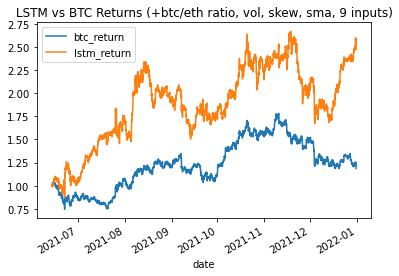

In [262]:
df2["btc_return"]=df2["btc_close_pct"]
df2["lstm_return"]=df2["pnl"]
(1 + df2[["btc_return","lstm_return"]]).cumprod().plot(title="LSTM vs BTC Returns (+btc/eth ratio, vol, skew, sma, 9 inputs)")

print("BTC Annualized Return: {:%}".format(btc_annualized_return))
print("BTC Annualized Standard Deviation: {:%}".format(btc_annualized_std))
print("BTC Sharpe Ratio: {}".format(btc_sharpe_ratio))

print("LSTM Annualized Return: {:%}".format(annualized_return))
print("LSTM Annualized Standard Deviation: {:%}".format(annualized_std))
print("LSTM Sharpe Ratio: {}".format(sharpe_ratio))

In [257]:
df1.value_counts()

-2  -1  0  1  2
0   0   0  1  0    2205
    1   0  0  0    1532
    0   0  0  1    1097
dtype: int64

In [258]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 9, 9)              396       
                                                                 
 dropout_18 (Dropout)        (None, 9, 9)              0         
                                                                 
 lstm_19 (LSTM)              (None, 9, 9)              684       
                                                                 
 dropout_19 (Dropout)        (None, 9, 9)              0         
                                                                 
 lstm_20 (LSTM)              (None, 9)                 684       
                                                                 
 dropout_20 (Dropout)        (None, 9)                 0         
                                                                 
 dense_6 (Dense)             (None, 5)                

In [259]:
print(btc_testing_report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       851
           1       0.25      0.33      0.29      1172
           2       0.00      0.00      0.00       754
           3       0.27      0.50      0.35      1197
           4       0.23      0.29      0.26       860

   micro avg       0.25      0.25      0.25      4834
   macro avg       0.15      0.22      0.18      4834
weighted avg       0.17      0.25      0.20      4834
 samples avg       0.25      0.25      0.25      4834



<AxesSubplot:>

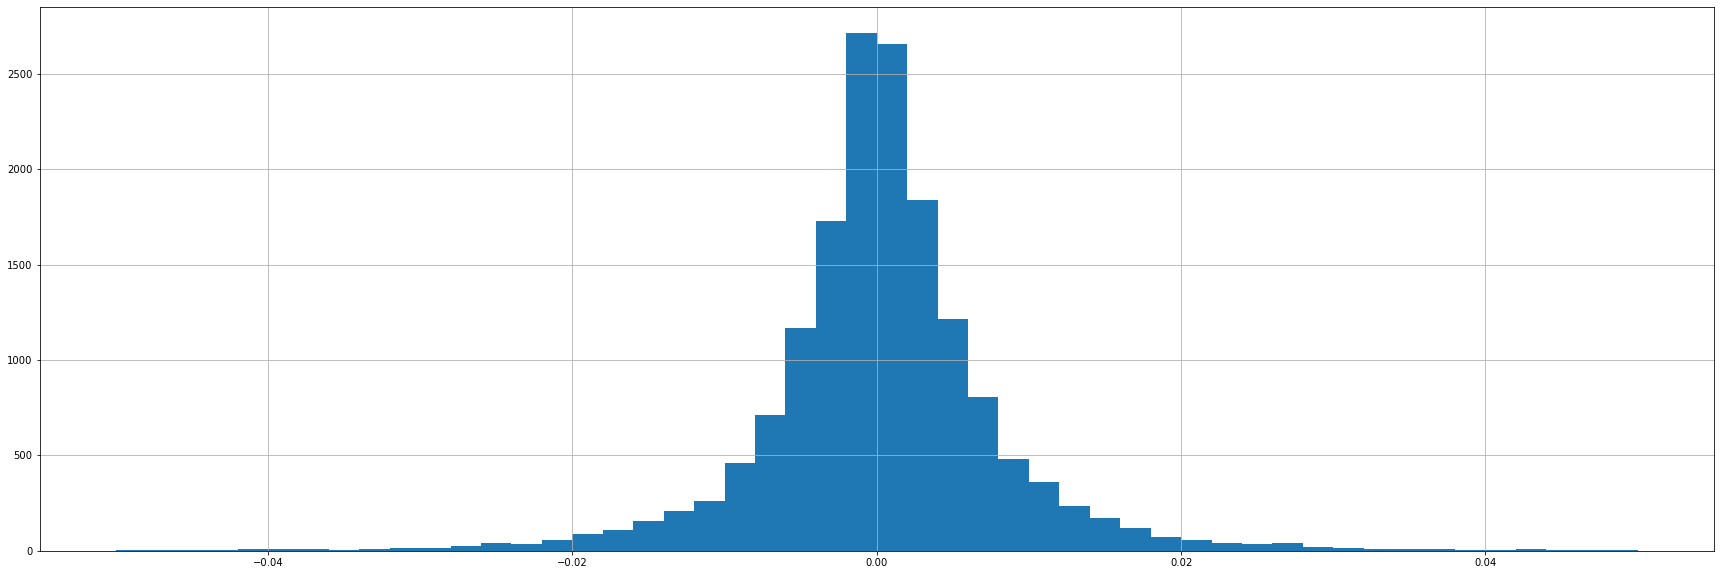

In [260]:

z.hist(figsize=(30,10), range=(-.05,.05),bins=50)


In [261]:
#BTC summary stats over our test period
btc_annualized_return=df2["btc_close_pct"].mean()*24*365
btc_annualized_std=df2["btc_close_pct"].std()*((24*365)**(.5))
btc_sharpe_ratio=annualized_return/annualized_std

print("BTC Annualized Return: {:%}".format(annualized_return))
print("BTC Annualized Standard Deviation: {:%}".format(annualized_std))
print("BTC Sharpe Ratio: {}".format(sharpe_ratio))

BTC Annualized Return: 199.665387%
BTC Annualized Standard Deviation: 92.980575%
BTC Sharpe Ratio: 2.1473881611985055
